<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/42_Image_Discrete_Wavelet_Ttransform_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tartalom

A programot tőle függetlenül megírtam már korábban, de a magyarázata annyira jó, hogy ide raktam.

https://youtu.be/eJLF9HeZA8I?t=42

Az egyik legjobb, legszemléletesebb magyarázat, a Discrete Wavelet Transzformációra.

In [36]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.io

import pywt

from mpl_toolkits.mplot3d import axes3d

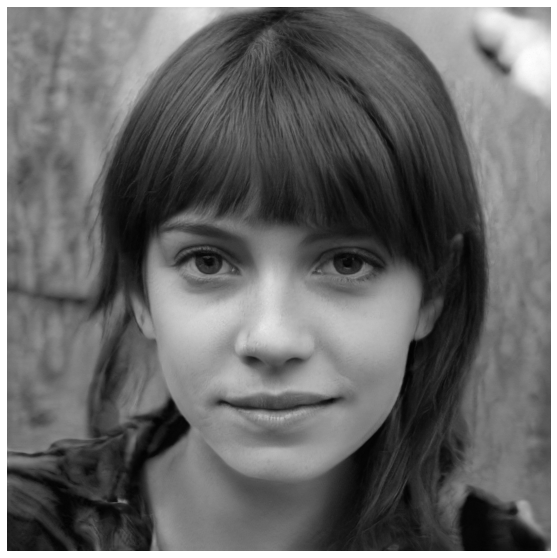

In [42]:
A = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')

B = np.mean(A, -1)

plt.figure(figsize=(10, 10))
plt.imshow(B, cmap = 'gray')
plt.axis('off')
plt.show()


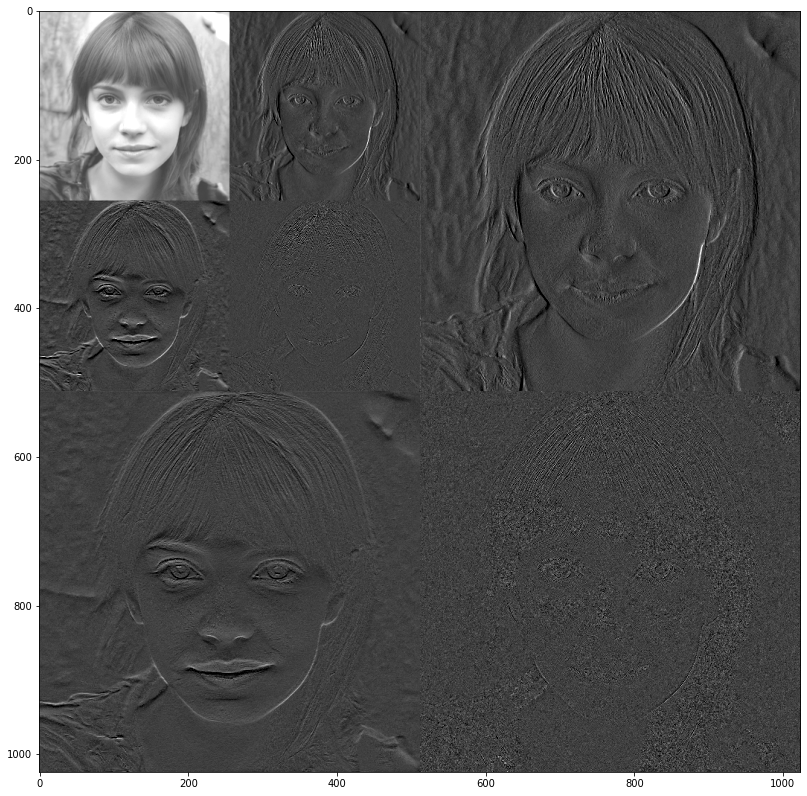

In [38]:
# Wavelet decomposition (2 level)

n = 2
w = 'db1'
coefficients = pywt.wavedec2(B, wavelet=w, level=n) # wavedec2 mert 2 dimenziós, ha hang lenne akkor csak simán wavedec

# Normalize each coefficient array
coefficients[0] /= np.abs(coefficients[0]).max()
for detail_level in range(n):
	coefficients[detail_level + 1] = [d/np.abs(d).max() for d in coefficients[detail_level+1]]

arr, coefficients_slices = pywt.coeffs_to_array(coefficients)

plt.figure(figsize=(14, 14))
plt.imshow(arr, cmap='gray', vmin=-0.25, vmax=0.75)
plt.show()

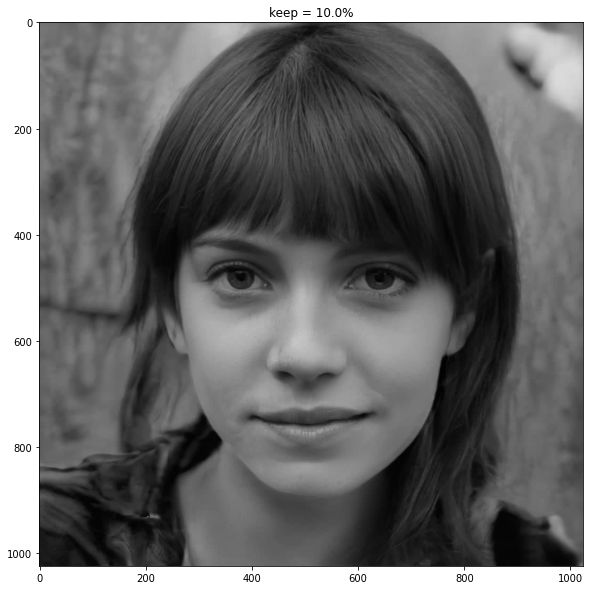

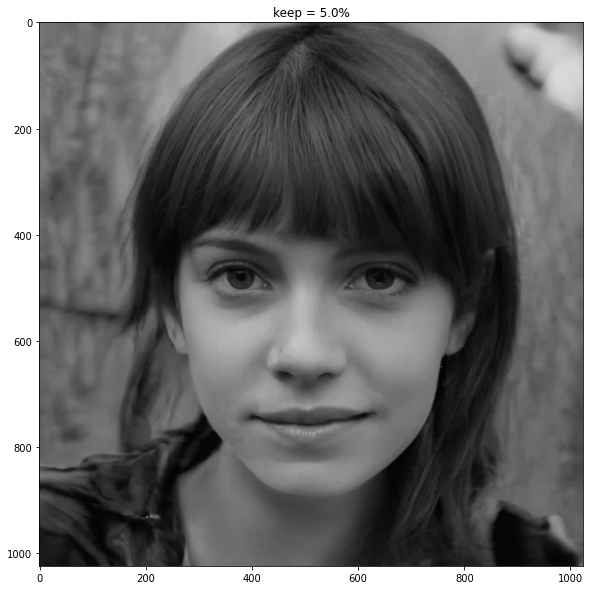

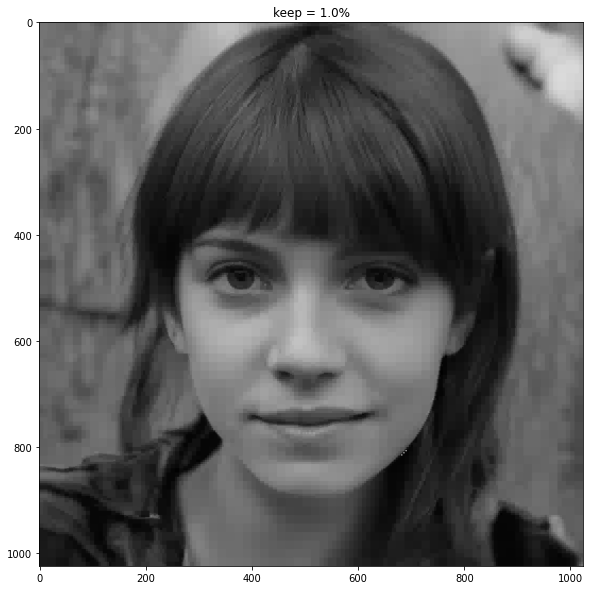

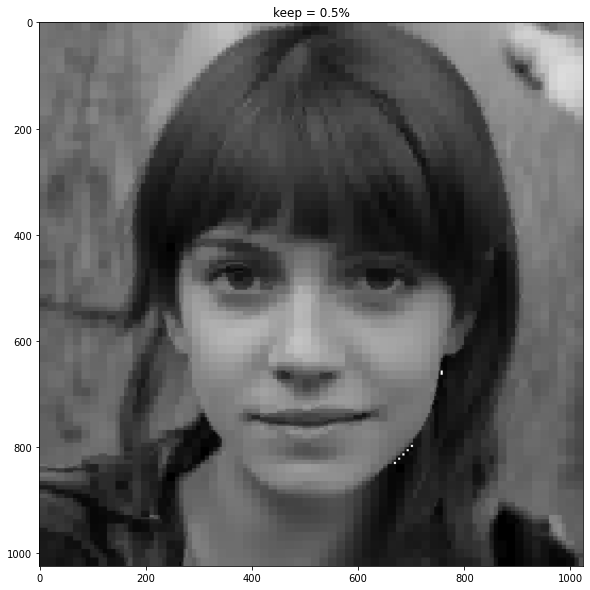

In [54]:
# Wavelet image compression

n = 4
w = 'db1'
coefficients = pywt.wavedec2(B, wavelet=w, level=n) # wavedec2 mert 2 dimenziós, ha hang lenne akkor csak simán wavedec

arr, coefficients_slices = pywt.coeffs_to_array(coefficients)

sorted_coefficients_array = np.sort(np.abs(arr.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.005):
  threshold = sorted_coefficients_array[int(np.floor((1-keep)*len(sorted_coefficients_array)))]
  index = np.abs(arr) > threshold
  filtered = arr * index

  filtered_coefficients = pywt.array_to_coeffs(filtered, coefficients_slices, output_format='wavedec2')

  # Plot reconstruction
  A = pywt.waverec2(filtered_coefficients, wavelet=w)
  plt.figure(figsize=(10, 10))
  plt.imshow(A.astype('uint8'), cmap='gray')
  plt.title('keep = ' + str(keep*100) + '%')

  if keep == 0.1: A1 = A
  if keep == 0.05: A2 = A


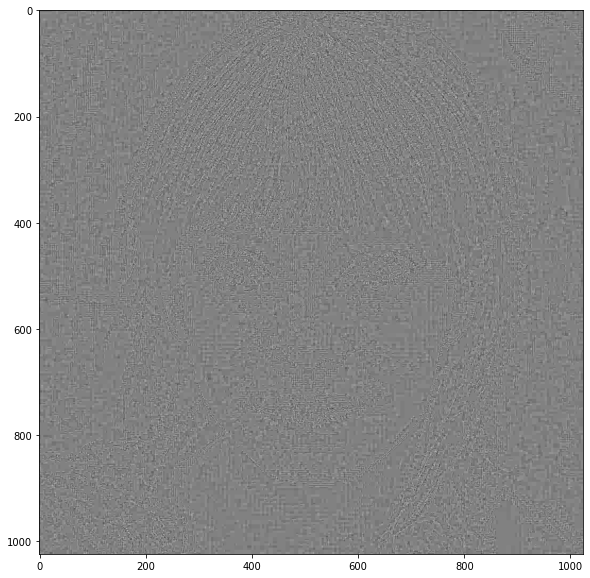

In [58]:
T = A1-A2
plt.figure(figsize=(10, 10))
plt.imshow(T, cmap='gray')